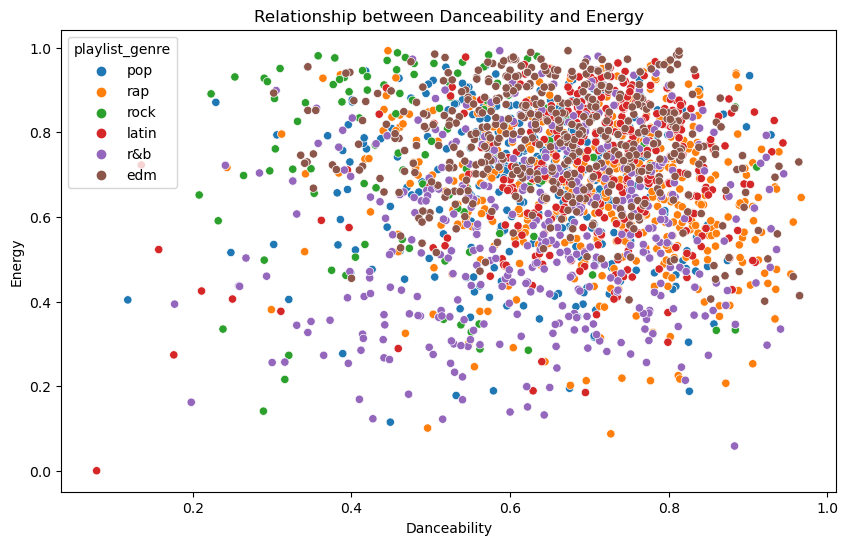

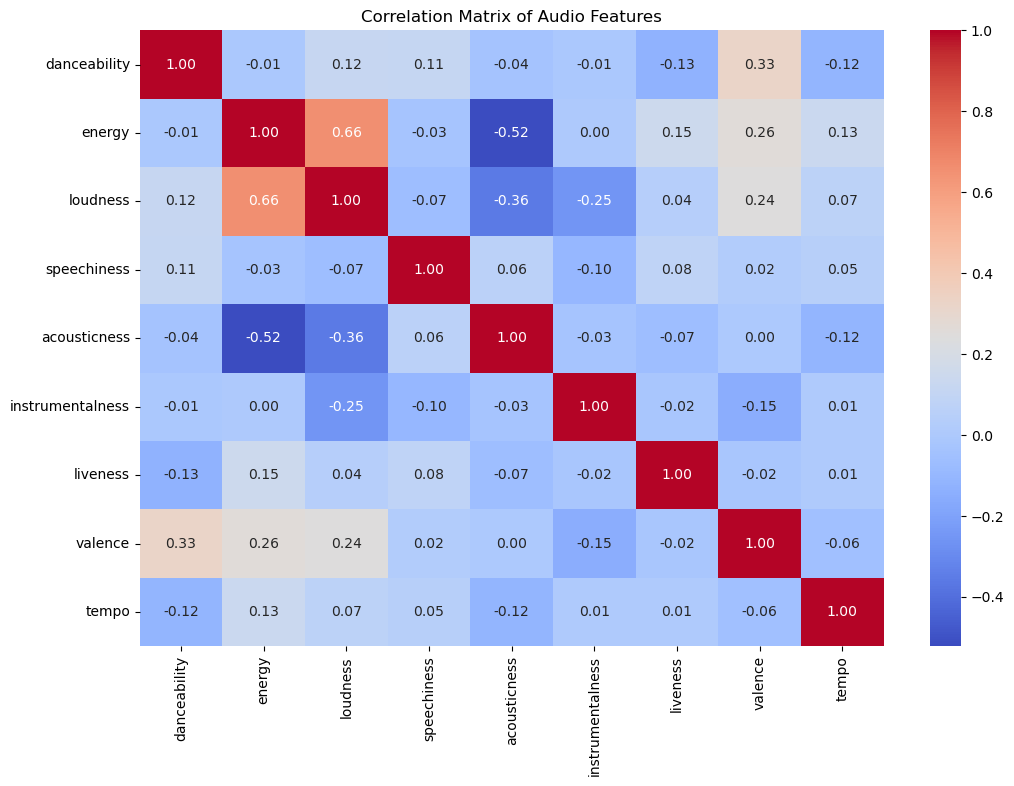

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'spotify.csv'  # Update this path to your file location
df = pd.read_csv(file_path)

# Convert 'track_album_release_date' to datetime to extract the year
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['year'] = df['track_album_release_date'].dt.year

# Filter the dataset for the year 2017
df_2017 = df[df['year'] == 2017]

# Group by genre and calculate the average of specified features
average_stats = df_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': 'mean'
}).reset_index()

# Convert duration from milliseconds to minutes
average_stats['duration_minutes'] = average_stats['duration_ms'] / 60000

# Drop the original 'duration_ms' column as it's no longer needed
average_stats = average_stats.drop(columns=['duration_ms'])

# Save the results to a CSV file
output_file_path = 'average_genre_stats_2017.csv'
average_stats.to_csv(output_file_path, index=False)

# Investigate relationships between danceability and energy
# Correlation analysis
correlation_matrix = df_2017[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()

# Visualize the relationship between danceability and energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2017, x='danceability', y='energy', hue='playlist_genre')
plt.title('Relationship between Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix_2017.csv')
